<a href="https://colab.research.google.com/github/Ry02024/SignateCup2024Summer_Ry03/blob/main/CompeCode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 著作権とライセンス
## クレジットとライセンスに関する注意

このノートブックの一部は、Yutak6116さん がGitHubに公開した著作物を基にしています。しかし、元の著作物にはライセンス情報が記載されていません。

- **元の著作物**: Yutak6116, "SignateCup2024Summer", https://github.com/Yutak6116/SignateCup2024Summer.git

私はこの著作物を元にノートブックを作成しましたが、元の著作物の利用に関しては、著作者の許可を得ることを推奨します。

- **著者**: Ryo Tanohata
- **ライセンス**: [Creative Commons BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/)

このノートブックは作成途中ですが、Ryo Tanohata によって作成されています。完成時には Creative Commons BY-NC-SA 4.0 ライセンスの下で提供されます。

現在の内容は途中経過であり、引き続き改良が行われる予定です。利用の際は著者のクレジットを表示し、非営利目的でのみ利用してください。また、改変した場合は同じライセンスの下で配布してください。


In [ ]:
## 前処理関数

# Age numeric
# 漢数字とアラビア数字のマッピング
kanji_to_num = {'一': 1, '二': 2, '三': 3, '四': 4, '五': 5, '六': 6, '七': 7, '八': 8, '九': 9,'十': 10, '百': 100, '千': 1000, '万': 10000,'零': 0, '〇': 0}
def kanji_to_arabic(kanji):
    result = 0
    temp = 0
    for char in kanji:
        value = kanji_to_num.get(char, None)
        if value is not None:
            if value < 10:
                if temp == 0:
                    temp = value
                else:
                    temp = temp * 10 + value
            elif value >= 10:
                if temp == 0:
                    temp = 1
                result += temp * value
                temp = 0
    return result + temp
def process_age(age):
    if age is None or str(age) == 'nan':
        return None

    age = unicodedata.normalize('NFKC', age)

    decade_pattern = r'(\d+)代'
    # Check for decade pattern (e.g., 10代, 60代)
    decade_match = re.search(decade_pattern, age)
    if decade_match:
        decade = int(decade_match.group(1))
        if decade == 10:
            return 19
        elif decade == 20:
            return 25
        elif decade == 30:
            return 35
        elif decade == 40:
            return 45
        elif decade == 50:
            return 55
        elif decade == 60:
            return 60
        else:
            return decade + 5

    age = ''.join([c for c in age if c.isdigit() or c in kanji_to_num])

    if age.isdigit():
        return int(age)
    return kanji_to_arabic(age)

# DurationOfPitch numeric
def convert_to_minutes(duration):
    # durationがfloat型またはNoneである可能性があるため、文字列であることを確認
    if pd.isnull(duration):
        return None  # NaNの場合、Noneを返す
    duration = str(duration)  # 文字列に変換してエラーを防ぐ
    if '分' in duration:
        return float(duration.replace('分', ''))
    elif '秒' in duration:
        return float(duration.replace('秒', '')) / 60  # 秒を分に変換し、整数で返す

# Gender categorical
def Gender_dealing(gender):
    # 文字列を半角に変換し、大文字に統一
    gender = unicodedata.normalize('NFKC', gender).upper().strip()
    # 不要な空白を削除
    gender = ''.join(gender.split())
    return gender

# NumberOfFollowups numeric
def NumberOfFollowups_dealing(input_int):
    if input_int >= 100: #常識的にx00回は記述ミスと判断
        return input_int /100
    else:
        return input_int

# NumberOfTrips numeric
def NumberOfTrips_dealing(str):
    if pd.isnull(str):
        return None
    if '半年に' in str:
        return 2 * int(str.replace('半年に', '').replace('回', ''))
    elif '年に' in str:
        return int(str.replace('年に', '').replace('回', ''))
    elif '四半期に' in str:
        return 4 * int(str.replace('四半期に', '').replace('回', ''))
    else :
        return int(str)

# Designation categorical
def standardize_str(input_str):
    # 文字列を半角に変換し、小文字に統一
    input_str = unicodedata.normalize('NFKC', input_str).lower().strip()
    # 不要な空白や特殊記号を削除
    input_str = ''.join(input_str.split())
    input_str = input_str.replace('|', 'l').replace('×', 'x').replace('𝘤', 'c').replace('𝖺', 'a').replace('𝙳', 'd')
    # その他特殊文字を通常の英字に置換
    input_str = input_str.replace('ᗞ', 'd').replace('𐊡', 'a').replace('𝘳', 'r').replace('ꓢ', 's').replace('ı', 'i')
    input_str = input_str.replace('β', 'b').replace('в', 'b').replace('с', 'c').replace('տ', 's').replace('ς', 'c')
    input_str = input_str.replace('ꭰ', 'd').replace('ε', 'e').replace('ι', 'i').replace('α', 'a').replace('ո', 'n')
    input_str = input_str.replace('ѕ', 's').replace('μ', 'm').replace('е', 'e').replace('а', 'a').replace('ѵ', 'v')
    input_str = input_str.replace('aasic', 'basic')
    return input_str

# MonthlyIncome numeric
def MonthlyIncome_dealing(input_str):
    if pd.isnull(input_str):
        return None
    if '月収' in input_str:
        return 10000 * float(input_str.replace('月収', '').replace('万円', ''))
    elif '万円' in input_str:
        return 10000 * float(input_str.replace('万円', ''))
    else:
        return float(input_str)

# customer_info
def customer_info_dealing(input_str):
    # 文字列を半角に変換し、小文字に統一
    input_str = unicodedata.normalize('NFKC', input_str).lower().strip()
    # 不要な空白や特殊記号を削除
    input_str = input_str.replace('/', ' ').replace('／', ' ').replace('、', ' ').replace('　', ' ')
    input_str = input_str.replace('\u3000', ' ').replace('\t', ' ').replace('\n', ' ')
    input_str = re.sub(r'(?<=\S)\s+(?=\S)', ',', input_str, count=2)
    return input_str

# car_possesion categorival(dummy)
def car_possesion_dealing(input_str):
    if input_str in ['車未所持', '自動車未所有', '自家用車なし', '乗用車なし', '車なし', '車保有なし', 0]:
        return "車あり"
    elif input_str in ['車所持', '自動車所有', '自家用車あり', '乗用車所持', '車保有', '車あり', 1]:
        return "車なし"

# offspring -1以外はnumeric
def offspring_dealing(input_str):
    if '1' in input_str:
        return 1
    elif '2' in input_str:
        return 2
    elif '3' in input_str:
        return 3
    else:
        return 0

def offspring_identified_dealing(input_str):
    if input_str in ['子供の数不明', '不明', 'わからない', '子育て状況不明', '子の数不詳']:
        return 1
    else:
        return 0

In [ ]:
def preprocess_data_for_catboost(df):
    # 各カラムに対する処理を適用
    df['Age'] = df['Age'].apply(process_age)
    df['DurationOfPitch'] = df['DurationOfPitch'].apply(convert_to_minutes)
    df['Occupation'] = df['Occupation'].apply(standardize_str)
    df['Gender'] = df['Gender'].apply(Gender_dealing)
    df['NumberOfFollowups'] = df['NumberOfFollowups'].apply(NumberOfFollowups_dealing)
    df['ProductPitched'] = df['ProductPitched'].apply(standardize_str)
    df['NumberOfTrips'] = df['NumberOfTrips'].apply(NumberOfTrips_dealing)
    df['Designation'] = df['Designation'].apply(standardize_str)
    df['MonthlyIncome'] = df['MonthlyIncome'].apply(MonthlyIncome_dealing)

    # 顧客情報の処理
    customer_info_processed = df['customer_info'].apply(customer_info_dealing).str.split(',', expand=True)
    df['married'] = customer_info_processed[0]
    df['car_possession'] = customer_info_processed[1].apply(car_possesion_dealing)
    df['offspring'] = customer_info_processed[2].apply(offspring_dealing)
    df['offspring_identified'] = customer_info_processed[2].apply(offspring_identified_dealing)
    df.drop('customer_info', axis=1, inplace=True)

    # カテゴリカル列を指定するためにカテゴリカル列名をリストで保持
    categorical_columns = ['CityTier', 'PreferredPropertyStar', 'PitchSatisfactionScore',
                           'TypeofContact', 'Occupation', 'Gender',
                           'ProductPitched', 'Designation', 'married', 'car_possession']

    # dfのデータ型を適切に変更
    for column in categorical_columns:
        df[column] = df[column].astype('category')

    # 欠損値のカウントを新しい列として追加
    df['MissingValuesCount'] = df.isnull().sum(axis=1)

    return df, categorical_columns

In [ ]:
!pip install japanize-matplotlib -q
import japanize_matplotlib
import pandas as pd
# from catboost import Pool

## 応用的な分析

### クラスタ分析

In [ ]:
#分析用の前処理関数
def preprocess_data4cluster(df):
    df['Age'] = df['Age'].apply(process_age)
    # df['TypeofContact'] = df['TypeofContact'].apply(TypeofContact_to_dummy)
    # CityTier
    df['DurationOfPitch'] = df['DurationOfPitch'].apply(convert_to_minutes)
    df['Occupation'] = df['Occupation'].apply(standardize_str)
    df['Gender'] = df['Gender'].apply(Gender_dealing)
    df['NumberOfFollowups'] = df['NumberOfFollowups'].apply(NumberOfFollowups_dealing)
    df['ProductPitched'] = df['ProductPitched'].apply(standardize_str)
    df['NumberOfTrips'] = df['NumberOfTrips'].apply(NumberOfTrips_dealing)
    df['Designation'] = df['Designation'].apply(standardize_str)
    df['MonthlyIncome'] = df['MonthlyIncome'].apply(MonthlyIncome_dealing)

    customer_info_processed = df['customer_info'].apply(customer_info_dealing).str.split(',', expand=True)
    df['married'] = customer_info_processed[0]
    df['car_possession'] = customer_info_processed[1].apply(car_possesion_dealing)
    df['offspring'] = customer_info_processed[2].apply(offspring_dealing)
    df['offspring_identified'] = customer_info_processed[2].apply(offspring_identified_dealing)
    df.drop('customer_info', axis=1, inplace=True)

    # 数値データの欠損値を平均値で補完
    for col in df.select_dtypes(include=['float64', 'int64']).columns:
        df[col].fillna(df[col].mean(), inplace=True)

    # カテゴリデータの欠損値を最頻値で補完
    for col in df.select_dtypes(include=['object']).columns:
        df[col].fillna(df[col].mode()[0], inplace=True)

    # One-Hot Encoding
    df = pd.get_dummies(df, columns=[
        'TypeofContact',
        'Occupation',
        'Gender',
        'ProductPitched',
        'Designation',
        'married',
        'car_possession'
    ], drop_first=True)

    return df

In [ ]:
data_dir = "/content/drive/MyDrive/0.Working/active/signate/旅行パッケージの成約率予測/"
train = pd.read_csv(data_dir + "train.csv")
test = pd.read_csv(data_dir + "test.csv")

In [ ]:
train_x = train.drop(['id', 'ProdTaken'], axis=1)
train_y = train['ProdTaken']
test_x = test.drop(['id'], axis=1)

In [ ]:
# データの結合
full_data = pd.concat([train_x, test_x], axis=0)

# 前処理
full_processed4cluster = preprocess_data4cluster(full_data)

In [ ]:
full_processed4cluster

,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,MonthlyIncome,...,ProductPitched_standard,ProductPitched_superdeluxe,Designation_executive,Designation_manager,Designation_seniormanager,Designation_vp,married_独身,married_結婚済み,married_離婚済み,car_possession_車なし
0,50.000000,2,15.0,1.0,4.0,3.0,5.0,1,4,253905.0,...,False,False,True,False,False,False,False,False,False,False
1,56.000000,1,14.0,1.0,4.0,3.0,2.0,1,4,404475.0,...,True,False,False,False,True,False,False,False,True,True
2,39.309654,1,10.0,1.0,3.0,3.0,4.0,0,4,278145.0,...,False,False,True,False,False,False,False,True,False,False
3,37.000000,2,18.0,1.0,3.0,4.0,1.0,0,5,326805.0,...,True,False,False,False,True,False,False,False,True,True
4,48.000000,3,17.0,1.0,3.0,4.0,4.0,0,4,258435.0,...,False,False,True,False,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3484,41.000000,1,14.0,1.0,3.0,3.0,2.0,0,4,261840.0,...,False,False,True,False,False,False,False,True,False,False
3485,44.000000,1,35.0,3.0,5.0,3.0,3.0,0,3,349770.0,...,False,False,False,True,False,False,False,True,False,True
3486,24.000000,2,21.0,2.0,3.0,3.0,2.0,0,3,270000.0,...,False,False,True,False,False,False,True,False,False,False
3487,25.000000,1,9.0,2.0,3.0,3.0,2.0,0,3,272430.0,...,False,False,True,False,False,False,False,True,False,False


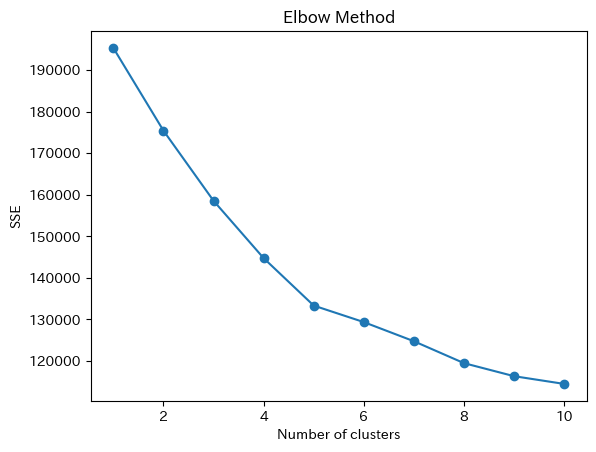

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# 数値データの標準化
features_scaled = StandardScaler().fit_transform(full_processed4cluster)

# エルボー法でクラスタ数を決定
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(features_scaled)
    sse.append(kmeans.inertia_)

# エルボー法のグラフをプロット
plt.plot(range(1, 11), sse, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

In [ ]:
# 最適なクラスタ数でKMeansクラスタリングを実行
optimal_clusters = 5
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42, n_init=10)  # n_init を明示的に設定
kmeans.fit(features_scaled)

# クラスタリング結果を追加
full_processed4cluster['Cluster'] = kmeans.labels_

# クラスタリング結果を確認
print(full_processed4cluster['Cluster'].value_counts())

Cluster
2    2325
1    2096
3    1624
0     641
4     292
Name: count, dtype: int64


In [ ]:
full_processed4cluster.shape

(6978, 29)

In [ ]:
import pandas as pd

# クラスタごとのデータ数を確認
cluster_counts = full_processed4cluster['Cluster'].value_counts()
print("Cluster counts:\n", cluster_counts)

# 数値データのクラスタごとの平均値を計算
numeric_columns = full_processed4cluster.select_dtypes(include=['float64', 'int64']).columns
cluster_means = full_processed4cluster.groupby('Cluster')[numeric_columns].mean()
print("\nCluster means for numeric columns:\n")
display(cluster_means)

# カテゴリカルデータのクラスタごとのクロス集計を表示
categorical_columns = full_processed4cluster.select_dtypes(include=['object', 'category', 'bool']).columns
for column in categorical_columns:
    cluster_crosstab = pd.crosstab(full_processed4cluster['Cluster'], full_processed4cluster[column])
    print(f"\nCluster crosstab for {column}:\n")
    display(cluster_crosstab)

Cluster counts:
 Cluster
2    2325
1    2096
3    1624
0     641
4     292
Name: count, dtype: int64

Cluster means for numeric columns:



,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,MonthlyIncome,offspring,offspring_identified
Cluster,,,,,,,,,,,,
0,48.468502,1.631825,15.503795,2.271451,3.523163,3.594384,3.507360,0.107644,2.319813,465792.748378,0.893916,0.053042
1,38.649347,1.823950,17.329334,2.463740,3.679227,3.292462,3.316515,0.075382,2.550573,338868.424940,1.080630,0.002385
2,34.254109,1.524731,13.338860,2.399140,3.714146,3.378495,3.206808,0.103226,2.605161,300937.081376,0.956129,0.002581
3,42.284673,1.810345,12.319581,2.355296,3.649015,3.647167,2.864427,0.116995,2.323276,390070.495690,0.975369,0.000000
4,47.651745,1.500000,12.556392,2.506849,3.777397,3.414384,3.674569,0.113014,2.845890,490042.825342,1.027397,0.099315



Cluster crosstab for TypeofContact_Self Enquiry:



TypeofContact_Self Enquiry,False,True
Cluster,,
0,222,419
1,752,1344
2,834,1491
3,663,961
4,45,247



Cluster crosstab for Occupation_salaried:



Occupation_salaried,False,True
Cluster,,
0,333,308
1,1137,959
2,1777,548
3,797,827
4,133,159



Cluster crosstab for Occupation_smallbusiness:



Occupation_smallbusiness,False,True
Cluster,,
0,347,294
1,1061,1035
2,900,1425
3,1035,589
4,179,113



Cluster crosstab for Gender_MALE:



Gender_MALE,False,True
Cluster,,
0,201,440
1,873,1223
2,904,1421
3,731,893
4,51,241



Cluster crosstab for ProductPitched_deluxe:



ProductPitched_deluxe,False,True
Cluster,,
0,641,0
1,30,2066
2,2314,11
3,1614,10
4,288,4



Cluster crosstab for ProductPitched_king:



ProductPitched_king,False,True
Cluster,,
0,641,0
1,2096,0
2,2321,4
3,1623,1
4,11,281



Cluster crosstab for ProductPitched_standard:



ProductPitched_standard,False,True
Cluster,,
0,641,0
1,2089,7
2,2308,17
3,38,1586
4,288,4



Cluster crosstab for ProductPitched_superdeluxe:



ProductPitched_superdeluxe,False,True
Cluster,,
0,3,638
1,2096,0
2,2323,2
3,1624,0
4,292,0



Cluster crosstab for Designation_executive:



Designation_executive,False,True
Cluster,,
0,630,11
1,2095,1
2,13,2312
3,1623,1
4,287,5



Cluster crosstab for Designation_manager:



Designation_manager,False,True
Cluster,,
0,624,17
1,19,2077
2,2322,3
3,1606,18
4,290,2



Cluster crosstab for Designation_seniormanager:



Designation_seniormanager,False,True
Cluster,,
0,627,14
1,2085,11
2,2323,2
3,35,1589
4,276,16



Cluster crosstab for Designation_vp:



Designation_vp,False,True
Cluster,,
0,632,9
1,2096,0
2,2325,0
3,1622,2
4,39,253



Cluster crosstab for married_独身:



married_独身,False,True
Cluster,,
0,477,164
1,1858,238
2,1599,726
3,1486,138
4,249,43



Cluster crosstab for married_結婚済み:



married_結婚済み,False,True
Cluster,,
0,418,223
1,1216,880
2,1506,819
3,900,724
4,92,200



Cluster crosstab for married_離婚済み:



married_離婚済み,False,True
Cluster,,
0,412,229
1,1622,474
2,1688,637
3,1319,305
4,249,43



Cluster crosstab for car_possession_車なし:



car_possession_車なし,False,True
Cluster,,
0,199,442
1,1354,742
2,1252,1073
3,699,925
4,115,177




---

**Cluster 0: 高収入・管理職・VPクラスタ**  
特性: 年齢が高く、収入が最も高い。主にVPなどの高位職。男性が多く、superdeluxe 製品を好む。車なしの割合が高く、独身率や離婚済み率も高い。

---

**Cluster 1: 高収入・シニアマネージャークラスタ**  
特性: 年齢が高く、シニアマネージャーやsmall businessに従事する人が多い。deluxe 製品を選ぶ傾向があり、車なしの割合が比較的高い。

---

**Cluster 2: 若年層・低収入・サラリーマンクラスタ**  
特性: 若年層で収入が低く、主にサラリーマン。standard 製品を選択する傾向が強い。車なし率が高いが、全体的に収入は低め。

---

**Cluster 3: 中間層・サラリーマン・スタンダードクラスタ**  
特性: 年齢と収入が中間層。standard 製品を好み、サラリーマンが多い。車なしの割合もやや高く、結婚済みの割合が比較的高い。

---

**Cluster 4: 中間層・小規模ビジネス・車なしクラスタ**  
特性: 年齢がやや高く、小規模ビジネスに従事する人が多い。king 製品を好む。車なしの割合が最も高く、vp職の割合も他のクラスタより高い。

---

# 機械学習のPDCA：予測モデルの生成

## CatBoost+missing

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#numpy, matplotlib, pandasのインポート
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import re
import unicodedata

#lightGBMのインポート
import lightgbm as lgb

#訓練データとテストデータ分割のためにインポート
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, StratifiedKFold

#標準化のためインポート
from sklearn.preprocessing import StandardScaler

#エンコーディングのためインポート
from sklearn.preprocessing import LabelEncoder

#精度検証のためインポート
from sklearn.metrics import log_loss, accuracy_score, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve

#ハイパーパラメータチューニングのためにインポート

#特徴量選択のためにインポート
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LassoCV

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [ ]:
data_dir = "/content/drive/MyDrive/0.Working/active/signate/旅行パッケージの成約率予測/"

In [ ]:
# 自分のドライブにマウントしているとドライブ上のファイルを読み込むことができます。
# ファイルの場所がわからない場合、左のタブから目的のファイルを探し、「パスをコピー」しペーストすることで読み込めます。
train = pd.read_csv(data_dir + "train.csv")
test = pd.read_csv(data_dir + "test.csv")

In [ ]:
train_x = train.drop(['id', 'ProdTaken'], axis=1)
train_y = train['ProdTaken']
test_x = test.drop(['id'], axis=1)

In [ ]:
!pip install catboost -q
import pandas as pd
from catboost import CatBoostClassifier, Pool

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 6.3 MB/s eta 0:00:00


## 前処理関数

In [ ]:
# Age numeric
# 漢数字とアラビア数字のマッピング
kanji_to_num = {'一': 1, '二': 2, '三': 3, '四': 4, '五': 5, '六': 6, '七': 7, '八': 8, '九': 9,'十': 10, '百': 100, '千': 1000, '万': 10000,'零': 0, '〇': 0}
def kanji_to_arabic(kanji):
    result = 0
    temp = 0
    for char in kanji:
        value = kanji_to_num.get(char, None)
        if value is not None:
            if value < 10:
                if temp == 0:
                    temp = value
                else:
                    temp = temp * 10 + value
            elif value >= 10:
                if temp == 0:
                    temp = 1
                result += temp * value
                temp = 0
    return result + temp
def process_age(age):
    if age is None or str(age) == 'nan':
        return None

    age = unicodedata.normalize('NFKC', age)

    decade_pattern = r'(\d+)代'
    # Check for decade pattern (e.g., 10代, 60代)
    decade_match = re.search(decade_pattern, age)
    if decade_match:
        decade = int(decade_match.group(1))
        if decade == 10:
            return 19
        elif decade == 20:
            return 25
        elif decade == 30:
            return 35
        elif decade == 40:
            return 45
        elif decade == 50:
            return 55
        elif decade == 60:
            return 60
        else:
            return decade + 5

    age = ''.join([c for c in age if c.isdigit() or c in kanji_to_num])

    if age.isdigit():
        return int(age)
    return kanji_to_arabic(age)

In [ ]:
# DurationOfPitch numeric
def convert_to_minutes(duration):
    # durationがfloat型またはNoneである可能性があるため、文字列であることを確認
    if pd.isnull(duration):
        return None  # NaNの場合、Noneを返す
    duration = str(duration)  # 文字列に変換してエラーを防ぐ
    if '分' in duration:
        return float(duration.replace('分', ''))
    elif '秒' in duration:
        return float(duration.replace('秒', '')) / 60  # 秒を分に変換し、整数で返す

In [ ]:
# Gender categorical
def Gender_dealing(gender):
    # 文字列を半角に変換し、大文字に統一
    gender = unicodedata.normalize('NFKC', gender).upper().strip()
    # 不要な空白を削除
    gender = ''.join(gender.split())
    return gender

In [ ]:
# NumberOfFollowups numeric
def NumberOfFollowups_dealing(input_int):
    if input_int >= 100: #常識的にx00回は記述ミスと判断
        return input_int /100
    else:
        return input_int

In [ ]:
# NumberOfTrips numeric
def NumberOfTrips_dealing(str):
    if pd.isnull(str):
        return None
    if '半年に' in str:
        return 2 * int(str.replace('半年に', '').replace('回', ''))
    elif '年に' in str:
        return int(str.replace('年に', '').replace('回', ''))
    elif '四半期に' in str:
        return 4 * int(str.replace('四半期に', '').replace('回', ''))
    else :
        return int(str)

In [ ]:
# Designation categorical
def standardize_str(input_str):
    # 文字列を半角に変換し、小文字に統一
    input_str = unicodedata.normalize('NFKC', input_str).lower().strip()
    # 不要な空白や特殊記号を削除
    input_str = ''.join(input_str.split())
    input_str = input_str.replace('|', 'l').replace('×', 'x').replace('𝘤', 'c').replace('𝖺', 'a').replace('𝙳', 'd')
    # その他特殊文字を通常の英字に置換
    input_str = input_str.replace('ᗞ', 'd').replace('𐊡', 'a').replace('𝘳', 'r').replace('ꓢ', 's').replace('ı', 'i')
    input_str = input_str.replace('β', 'b').replace('в', 'b').replace('с', 'c').replace('տ', 's').replace('ς', 'c')
    input_str = input_str.replace('ꭰ', 'd').replace('ε', 'e').replace('ι', 'i').replace('α', 'a').replace('ո', 'n')
    input_str = input_str.replace('ѕ', 's').replace('μ', 'm').replace('е', 'e').replace('а', 'a').replace('ѵ', 'v')
    input_str = input_str.replace('aasic', 'basic')
    return input_str

In [ ]:
# MonthlyIncome numeric
def MonthlyIncome_dealing(input_str):
    if pd.isnull(input_str):
        return None
    if '月収' in input_str:
        return 10000 * float(input_str.replace('月収', '').replace('万円', ''))
    elif '万円' in input_str:
        return 10000 * float(input_str.replace('万円', ''))
    else:
        return float(input_str)

In [ ]:
# customer_info
def customer_info_dealing(input_str):
    # 文字列を半角に変換し、小文字に統一
    input_str = unicodedata.normalize('NFKC', input_str).lower().strip()
    # 不要な空白や特殊記号を削除
    input_str = input_str.replace('/', ' ').replace('／', ' ').replace('、', ' ').replace('　', ' ')
    input_str = input_str.replace('\u3000', ' ').replace('\t', ' ').replace('\n', ' ')
    input_str = re.sub(r'(?<=\S)\s+(?=\S)', ',', input_str, count=2)
    return input_str

In [ ]:
!pip install japanize-matplotlib -q
import japanize_matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 34.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [ ]:
# car_possesion categorival(dummy)
def car_possesion_dealing(input_str):
    if input_str in ['車未所持', '自動車未所有', '自家用車なし', '乗用車なし', '車なし', '車保有なし', 0]:
        return "車あり"
    elif input_str in ['車所持', '自動車所有', '自家用車あり', '乗用車所持', '車保有', '車あり', 1]:
        return "車なし"

In [ ]:
# offspring -1以外はnumeric
def offspring_dealing(input_str):
    if '1' in input_str:
        return 1
    elif '2' in input_str:
        return 2
    elif '3' in input_str:
        return 3
    else:
        return 0

def offspring_identified_dealing(input_str):
    if input_str in ['子供の数不明', '不明', 'わからない', '子育て状況不明', '子の数不詳']:
        return 1
    else:
        return 0

In [ ]:
import pandas as pd
# from catboost import Pool

def preprocess_data_for_catboost(df):
    # 各カラムに対する処理を適用
    df['Age'] = df['Age'].apply(process_age)
    df['DurationOfPitch'] = df['DurationOfPitch'].apply(convert_to_minutes)
    df['Occupation'] = df['Occupation'].apply(standardize_str)
    df['Gender'] = df['Gender'].apply(Gender_dealing)
    df['NumberOfFollowups'] = df['NumberOfFollowups'].apply(NumberOfFollowups_dealing)
    df['ProductPitched'] = df['ProductPitched'].apply(standardize_str)
    df['NumberOfTrips'] = df['NumberOfTrips'].apply(NumberOfTrips_dealing)
    df['Designation'] = df['Designation'].apply(standardize_str)
    df['MonthlyIncome'] = df['MonthlyIncome'].apply(MonthlyIncome_dealing)

    # 顧客情報の処理
    customer_info_processed = df['customer_info'].apply(customer_info_dealing).str.split(',', expand=True)
    df['married'] = customer_info_processed[0]
    df['car_possession'] = customer_info_processed[1].apply(car_possesion_dealing)
    df['offspring'] = customer_info_processed[2].apply(offspring_dealing)
    df['offspring_identified'] = customer_info_processed[2].apply(offspring_identified_dealing)
    df.drop('customer_info', axis=1, inplace=True)

    # カテゴリカル列を指定するためにカテゴリカル列名をリストで保持
    categorical_columns = ['CityTier', 'PreferredPropertyStar', 'PitchSatisfactionScore',
                           'TypeofContact', 'Occupation', 'Gender',
                           'ProductPitched', 'Designation', 'married', 'car_possession']

    # dfのデータ型を適切に変更
    for column in categorical_columns:
        df[column] = df[column].astype('category')

    # 欠損値のカウントを新しい列として追加
    #df['MissingValuesCount'] = df.isnull().sum(axis=1)

    return df, categorical_columns

## 前処理の実行

In [ ]:
# データの結合
full_data = pd.concat([train_x, test_x], axis=0)
full_data['Cluster'] = full_processed4cluster['Cluster']

# 前処理関数（仮の関数名を使用）
full_processed, categorical_columns = preprocess_data_for_catboost(full_data)

# # Cluster列をカテゴリカル変数として追加
# full_processed['Cluster'] = full_processed['Cluster'].astype(str)  # カテゴリカル変数として扱うために文字列に変換
categorical_columns.append('Cluster')  # categorical_columnsリストに追加

# カテゴリカルフィーチャーのNaNを最頻値で埋める
for col in categorical_columns:
    mode_value = full_processed[col].mode()[0]
    full_processed[col] = full_processed[col].fillna(mode_value)

    # 数値をカテゴリカルフィーチャーとして扱うために文字列に変換
    full_processed[col] = full_processed[col].astype(str)

# トレーニングデータとテストデータに再分割
train_x_processed = full_processed[:len(train_x)]
test_x_processed = full_processed[len(train_x):]

# トレーニングデータ用のターゲットを再取得
train_y_processed = train_y

In [ ]:
full_processed

,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,Designation,MonthlyIncome,married,car_possession,offspring,offspring_identified,MissingValuesCount
0,50.0,Self Enquiry,2,15.0,largebusiness,MALE,1.0,4.0,basic,3.0,5.0,1,4,executive,253905.0,未婚,車あり,0,0,0
1,56.0,Company Invited,1,14.0,salaried,MALE,1.0,4.0,standard,3.0,2.0,1,4,seniormanager,404475.0,離婚済み,車なし,0,0,0
2,NaN,Self Enquiry,1,10.0,largebusiness,FEMALE,1.0,3.0,basic,3.0,4.0,0,4,executive,278145.0,結婚済み,車あり,0,0,1
3,37.0,Self Enquiry,2,18.0,smallbusiness,FEMALE,1.0,3.0,standard,4.0,1.0,0,5,seniormanager,326805.0,離婚済み,車なし,0,0,0
4,48.0,Company Invited,3,17.0,smallbusiness,FEMALE,1.0,3.0,basic,4.0,4.0,0,4,executive,258435.0,独身,車なし,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3484,41.0,Company Invited,1,14.0,smallbusiness,FEMALE,1.0,3.0,basic,3.0,2.0,0,4,executive,261840.0,結婚済み,車あり,0,0,0
3485,44.0,Company Invited,1,35.0,salaried,MALE,3.0,5.0,deluxe,3.0,3.0,0,3,manager,349770.0,結婚済み,車なし,1,0,0
3486,24.0,Self Enquiry,2,21.0,smallbusiness,MALE,2.0,3.0,basic,3.0,2.0,0,3,executive,270000.0,独身,車あり,0,0,0
3487,25.0,Self Enquiry,1,9.0,smallbusiness,MALE,2.0,3.0,basic,3.0,2.0,0,3,executive,272430.0,結婚済み,車あり,1,0,0


## kfold2：5つのモデルの平均

**関数の定義**

In [ ]:
from catboost import Pool
from sklearn.model_selection import KFold

def create_kfold_data(train_x_processed, train_y_processed, categorical_columns, n_splits=5, random_state=42):
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=random_state)
    kfold_data = []

    for train_index, valid_index in kf.split(train_x_processed):
        X_train, X_valid = train_x_processed.iloc[train_index], train_x_processed.iloc[valid_index]
        y_train, y_valid = train_y_processed.iloc[train_index], train_y_processed.iloc[valid_index]

        train_pool = Pool(X_train, label=y_train, cat_features=categorical_columns)
        valid_pool = Pool(X_valid, label=y_valid, cat_features=categorical_columns)

        kfold_data.append((train_pool, valid_pool))

    return kfold_data

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

def train_and_evaluate_models(kfold_data, n_iterations=1000, learning_rate=0.05, depth=6, random_seed=42):
    fold_scores = []
    models = []

    for train_pool, valid_pool in kfold_data:
        model = CatBoostClassifier(
            iterations=n_iterations,
            learning_rate=learning_rate,
            depth=depth,
            eval_metric='AUC',
            random_seed=random_seed,
            verbose=100
        )

        model.fit(
            train_pool,
            eval_set=valid_pool,
            early_stopping_rounds=100
        )

        y_valid_pred = model.predict_proba(valid_pool)[:, 1]
        auc_score = roc_auc_score(valid_pool.get_label(), y_valid_pred)
        fold_scores.append(auc_score)
        models.append(model)

        print(f"このフォールドのAUC: {auc_score:.4f}")

        # 検証結果を可視化
        plot_evaluation_curves(valid_pool.get_label(), y_valid_pred)

    print(f"全フォールドの平均AUC: {np.mean(fold_scores):.4f}")

    return models

def plot_evaluation_curves(y_true, y_pred):
    # ROC曲線のデータを取得
    fpr, tpr, _ = roc_curve(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr, tpr, label='CatBoost Model')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='best')
    plt.show()

    # PR曲線のデータを取得
    precision, recall, _ = precision_recall_curve(y_true, y_pred)
    ap_score = average_precision_score(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, label=f'CatBoost Model (AP = {ap_score:.3f})')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend(loc='best')

    # ランダム分類器のベースラインを追加
    no_skill = len(y_true[y_true == 1]) / len(y_true)
    plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.show()

In [ ]:
def predict_with_models(models, test_x_processed):
    predictions = np.zeros(len(test_x_processed))

    for model in models:
        predictions += model.predict_proba(test_x_processed)[:, 1]

    # 予測の平均化
    predictions /= len(models)

    return predictions

def save_predictions(predictions, file_name='submission_catboost_kfold_mean.csv'):
    # 提出用データフレームに予測結果を代入
    submit = pd.read_csv(data_dir + "sample_submit.csv", header=None)
    submit[1] = predictions

    # CSVファイルに書き出し
    submit.to_csv(file_name, index=False, header=False)

**処理の実行**

In [ ]:
# 1. 交差検証データの作成
kfold_data = create_kfold_data(train_x_processed, train_y_processed, categorical_columns, n_splits=4)

In [ ]:
from catboost import CatBoostClassifier, Pool

0:	test: 0.7052082	best: 0.7052082 (0)	total: 73.2ms	remaining: 1m 13s
100:	test: 0.8647547	best: 0.8647547 (98)	total: 1.97s	remaining: 17.5s
200:	test: 0.8651925	best: 0.8660905 (142)	total: 3.78s	remaining: 15s
300:	test: 0.8604108	best: 0.8662027 (210)	total: 4.76s	remaining: 11.1s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8662027164
bestIteration = 210

Shrink model to first 211 iterations.
このフォールドのAUC: 0.8662


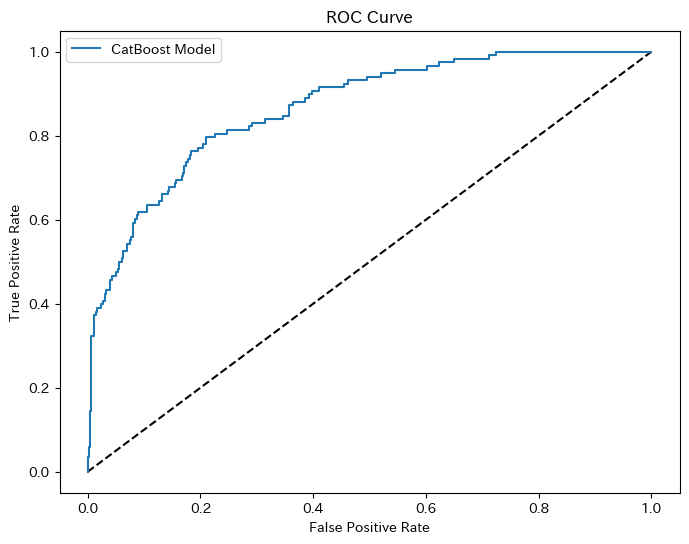

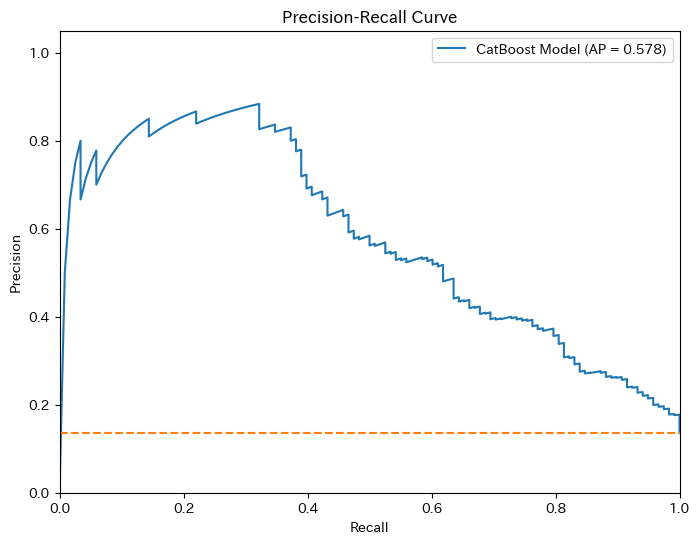

0:	test: 0.6496315	best: 0.6496315 (0)	total: 9.66ms	remaining: 9.65s
100:	test: 0.8110358	best: 0.8111928 (97)	total: 925ms	remaining: 8.23s
200:	test: 0.8100543	best: 0.8129889 (138)	total: 1.82s	remaining: 7.25s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8129888995
bestIteration = 138

Shrink model to first 139 iterations.
このフォールドのAUC: 0.8130


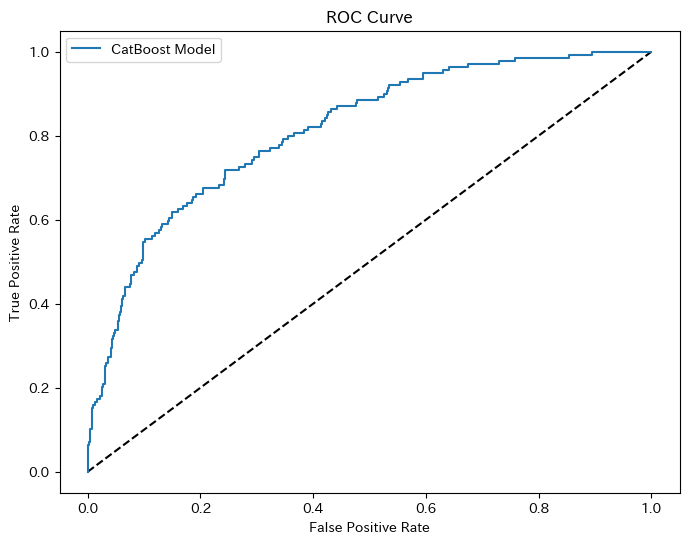

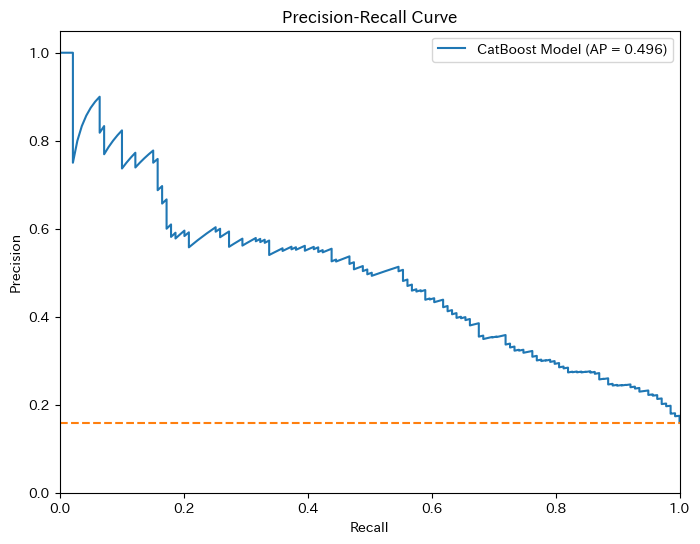

0:	test: 0.7455902	best: 0.7455902 (0)	total: 9.76ms	remaining: 9.75s
100:	test: 0.8362951	best: 0.8370710 (88)	total: 869ms	remaining: 7.73s
200:	test: 0.8367104	best: 0.8402295 (151)	total: 1.73s	remaining: 6.88s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8402295082
bestIteration = 151

Shrink model to first 152 iterations.
このフォールドのAUC: 0.8402


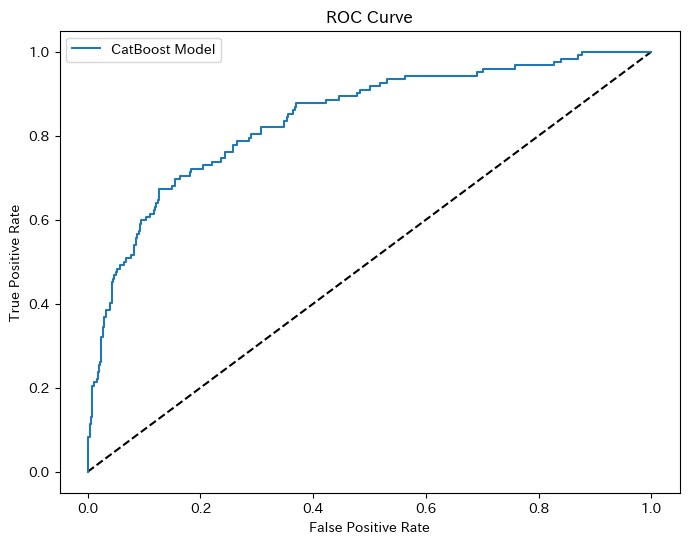

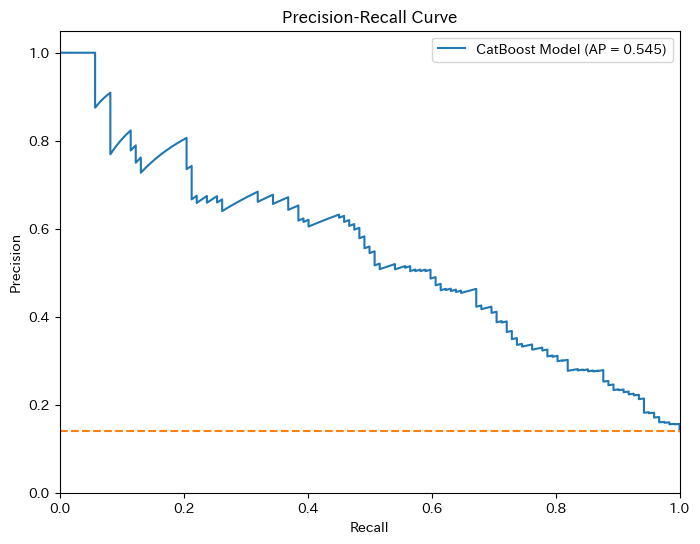

0:	test: 0.6334240	best: 0.6334240 (0)	total: 10.1ms	remaining: 10.1s
100:	test: 0.8258553	best: 0.8266084 (89)	total: 855ms	remaining: 7.61s
200:	test: 0.8241244	best: 0.8278447 (120)	total: 1.74s	remaining: 6.92s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8278447152
bestIteration = 120

Shrink model to first 121 iterations.
このフォールドのAUC: 0.8278


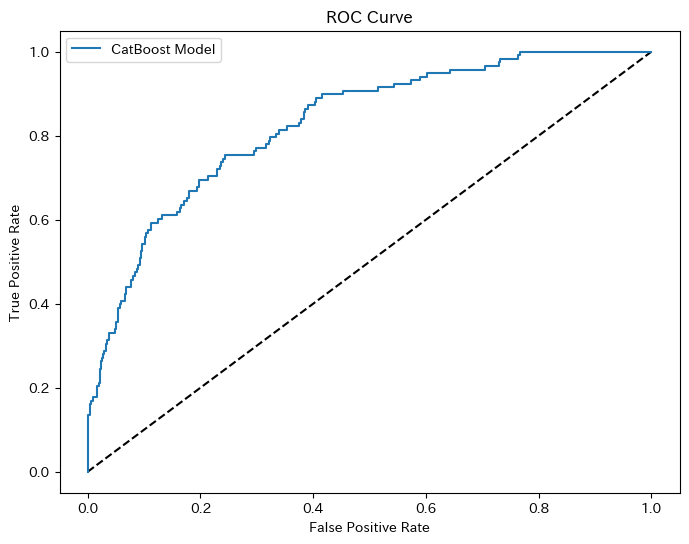

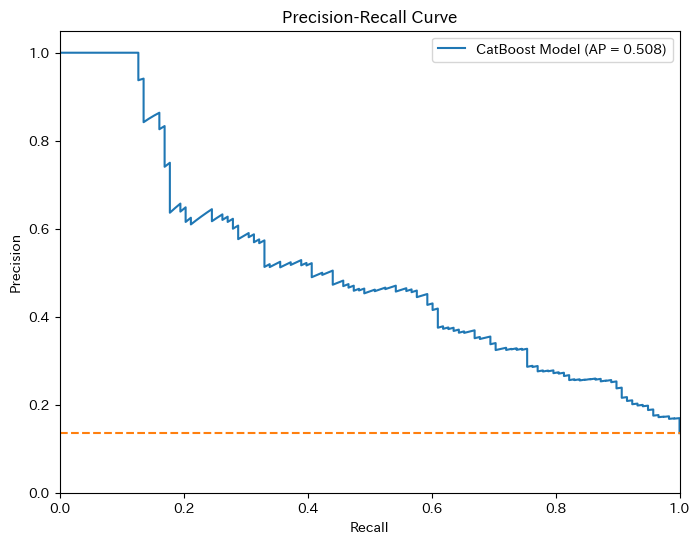

全フォールドの平均AUC: 0.8368


In [ ]:
# 2. モデルの学習と検証結果の可視化
models = train_and_evaluate_models(kfold_data)

**モデルの重みの最適化**  
加重平均（単純平均）と調和平均

In [ ]:
import numpy as np
from sklearn.metrics import roc_auc_score

def max_score(preds, dif, test_y, over_value_sum=[0.0], depth=[0], max=[0.0], ensemble_pred=None, max_ratio=[0.0], now_ratio=[0.0]):
    # ensemble_predの初期化
    if ensemble_pred is None:
        ensemble_pred = np.zeros(len(preds[0]))

    # 最深部での処理
    if len(preds) == depth[0] + 1:
        temp_ensemble_pred = np.copy(ensemble_pred)

        value = 1.0 - over_value_sum[0]
        now_ratio[depth[0]] = value

        ensemble_pred += preds[depth[0]] * value
        ensemble_auc = roc_auc_score(test_y, ensemble_pred)

        # 予測を元に戻す
        ensemble_pred = np.copy(temp_ensemble_pred)

        if ensemble_auc > max[0]:
            max[0] = ensemble_auc
            max_ratio[:] = now_ratio[:]

    # 最浅部での処理
    elif depth[0] == 0:
        while over_value_sum[0] <= 1.0 + dif:
            max_score(preds, dif, test_y, over_value_sum, depth=[1], max=max, ensemble_pred=np.zeros(len(preds[0])), max_ratio=max_ratio, now_ratio=np.zeros(len(preds)))

            over_value_sum[0] += dif

        return [max[0], max_ratio]

    # その他の深さでの処理
    else:
        temp_ensemble_pred = np.copy(ensemble_pred)
        temp_over_value_sum = over_value_sum[0]
        while over_value_sum[0] <= 1.0:
            max_score(preds, dif, test_y, over_value_sum, depth=[depth[0] + 1], max=max, ensemble_pred=ensemble_pred, max_ratio=max_ratio, now_ratio=now_ratio)

            ensemble_pred += preds[depth[0]] * dif
            now_ratio[depth[0]] += dif
            over_value_sum[0] += dif

        # 状態を元に戻す
        ensemble_pred = np.copy(temp_ensemble_pred)
        over_value_sum[0] = temp_over_value_sum
        now_ratio[depth[0]] = 0.0

In [ ]:
import numpy as np
from sklearn.metrics import roc_auc_score, average_precision_score

def max_score_2eval(preds, dif, test_y, over_value_sum=[0.0], depth=[0], best_score=[0.0], ensemble_pred=None, max_ratio=[0.0], now_ratio=[0.0]):
    # ensemble_predの初期化
    if ensemble_pred is None:
        ensemble_pred = np.zeros(len(preds[0]))

    # 最深部での処理
    if len(preds) == depth[0] + 1:
        temp_ensemble_pred = np.copy(ensemble_pred)

        value = 1.0 - over_value_sum[0]
        now_ratio[depth[0]] = value

        ensemble_pred += preds[depth[0]] * value
        ensemble_auc = roc_auc_score(test_y, ensemble_pred)
        ensemble_prauc = average_precision_score(test_y, ensemble_pred)

        # AUCとPRAUCの調和平均を計算
        if ensemble_auc + ensemble_prauc == 0:
            combined_score = 0  # 0で割るのを避けるため
        else:
            combined_score = 2 * (ensemble_auc * ensemble_prauc) / (ensemble_auc + ensemble_prauc)

        # 予測を元に戻す
        ensemble_pred = np.copy(temp_ensemble_pred)

        if combined_score > best_score[0]:
            best_score[0] = combined_score
            max_ratio[:] = now_ratio[:]

    # 最浅部での処理
    elif depth[0] == 0:
        while over_value_sum[0] <= 1.0 + dif:
            max_score_2eval(preds, dif, test_y, over_value_sum, depth=[1], best_score=best_score, ensemble_pred=np.zeros(len(preds[0])), max_ratio=max_ratio, now_ratio=np.zeros(len(preds)))

            over_value_sum[0] += dif

        return [best_score[0], max_ratio]

    # その他の深さでの処理
    else:
        temp_ensemble_pred = np.copy(ensemble_pred)
        temp_over_value_sum = over_value_sum[0]
        while over_value_sum[0] <= 1.0:
            max_score_2eval(preds, dif, test_y, over_value_sum, depth=[depth[0] + 1], best_score=best_score, ensemble_pred=ensemble_pred, max_ratio=max_ratio, now_ratio=now_ratio)

            ensemble_pred += preds[depth[0]] * dif
            now_ratio[depth[0]] += dif
            over_value_sum[0] += dif

        # 状態を元に戻す
        ensemble_pred = np.copy(temp_ensemble_pred)
        over_value_sum[0] = temp_over_value_sum
        now_ratio[depth[0]] = 0.0

In [ ]:
preds = []
for model in models:
    preds.append(model.predict_proba(train_x_processed)[:, 1])  # 各モデルの予測結果を取得

dif = 0.05  # 重みのステップを設定
result = max_score(preds=preds, dif=dif, test_y=train_y_processed)  # test_y はテストデータの正解ラベル

print(f"最適なAUCスコア: {result[0]}")
print(f"最適な重みの組み合わせ: {result[1]}")

最適なAUCスコア: 0.8906944339835805
最適な重みの組み合わせ: [0.0, 0.05, 0.0, 0.04999999999999971]


In [ ]:
preds = []
for model in models:
    preds.append(model.predict_proba(train_x_processed)[:, 1])  # 各モデルの予測結果を取得

dif = 0.05  # 重みのステップを設定
result = max_score_2eval(preds=preds, dif=dif, test_y=train_y_processed)

optimal_score = result[0]  # 最適なスコア（調和平均）
optimal_weights = result[1]  # 最適な重みの組み合わせ

print(f"最適なスコア: {optimal_score}")
print(f"最適な重みの組み合わせ: {optimal_weights}")


最適なスコア: 0.7540262867778158
最適な重みの組み合わせ: [0.0, 0.05, 0.0, 0.04999999999999971]


In [ ]:
test_x_processed

,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,...,Passport,PitchSatisfactionScore,Designation,MonthlyIncome,Cluster,married,car_possession,offspring,offspring_identified,MissingValuesCount
0,48.0,Self Enquiry,2,13.0,smallbusiness,MALE,1.0,4.0,superdeluxe,3.0,...,0,3,avp,496950.0,0,結婚済み,車なし,0,0,0
1,35.0,Self Enquiry,2,12.0,smallbusiness,FEMALE,1.0,4.0,standard,3.0,...,1,3,seniormanager,300000.0,3,結婚済み,車あり,0,0,0
2,25.0,Self Enquiry,1,9.0,salaried,FEMALE,1.0,4.0,basic,3.0,...,0,3,executive,260000.0,2,離婚済み,車あり,0,0,0
3,21.0,Company Invited,2,7.0,salaried,MALE,1.0,4.0,basic,4.0,...,0,3,seniormanager,259875.0,3,離婚済み,車なし,0,0,0
4,41.0,Company Invited,1,7.0,salaried,MALE,1.0,4.0,basic,3.0,...,0,4,executive,268830.0,2,独身,車なし,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3484,41.0,Company Invited,1,14.0,smallbusiness,FEMALE,1.0,3.0,basic,3.0,...,0,4,executive,261840.0,2,結婚済み,車あり,0,0,0
3485,44.0,Company Invited,1,35.0,salaried,MALE,3.0,5.0,deluxe,3.0,...,0,3,manager,349770.0,1,結婚済み,車なし,1,0,0
3486,24.0,Self Enquiry,2,21.0,smallbusiness,MALE,2.0,3.0,basic,3.0,...,0,3,executive,270000.0,2,独身,車あり,0,0,0
3487,25.0,Self Enquiry,1,9.0,smallbusiness,MALE,2.0,3.0,basic,3.0,...,0,3,executive,272430.0,2,結婚済み,車あり,1,0,0


In [ ]:
categorical_columns

['CityTier',
 'PreferredPropertyStar',
 'PitchSatisfactionScore',
 'TypeofContact',
 'Occupation',
 'Gender',
 'ProductPitched',
 'Designation',
 'married',
 'car_possession',
 'Cluster']

In [ ]:
from catboost import Pool

# 1. Poolオブジェクトを作成
test_pool = Pool(data=test_x_processed, cat_features=categorical_columns)

# 2. 各モデルでテストデータの予測を取得
test_preds = []
for model in models:
    y_test_pred_probs = model.predict_proba(test_pool)[:, 1]  # テストデータでの予測
    test_preds.append(y_test_pred_probs)

# 3. 最適な重みを使って予測を合算
optimal_weights = result[1]  # max_score関数で得られた最適な重み
final_test_predictions = np.zeros(len(test_preds[0]))

# 各モデルの予測結果に対して、最適な重みを適用して合算
for i, weight in enumerate(optimal_weights):
    final_test_predictions += weight * test_preds[i]

# 4. 結果をCSVファイルに保存
# submit_sample.csvを読み込みます
submit = pd.read_csv(data_dir + "sample_submit.csv", header=None)

# 提出用データフレームに予測結果を代入
submit[1] = final_test_predictions

# CSVファイルに書き出し
submit.to_csv('submission_optimized_with_cluster2.csv', index=False, header=False)

print("最終的な予測結果が submission_optimized_with_cluster2.csv に保存されました。")

最終的な予測結果が submission_optimized_with_cluster2.csv に保存されました。


In [ ]:
submit

,0,1
0,3489,0.006282
1,3490,0.013984
2,3491,0.020355
3,3492,0.020549
4,3493,0.032195
...,...,...
3484,6973,0.013083
3485,6974,0.001561
3486,6975,0.065919
3487,6976,0.017946
